In [1]:
import numpy as np
import matplotlib.pyplot as plt

def RadialNeuron(x, r, c):
    return np.exp((-1/(2*r**2)) * (x - c) ** 2)

x = np.array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])
y = np.array([-0.48, -0.78, -0.83, -0.67, -0.20, 0.70, 1.48, 1.17, 0.20])

radius = 1
centres = [-2.0, -1.0, 0.0, 1.0, 2.0]

H = np.array([[0.1]*5 for i in range(9)])

for i in range(len(x)):
    k = 0             #Для изменения значений центров
    for j in range(5):
        H[i][j] = RadialNeuron(x[i], radius, centres[k])
        k += 1

# Вычислим конечные значения весов

In [2]:
W = np.linalg.matrix_power(np.dot(H.T, H), -1).dot(H.T)
W = W.dot(y)
W

array([-0.68162085,  0.77469835, -2.869535  ,  4.24651543, -1.95181919])

# Выходные значения с обученными весами

In [3]:
x_test = np.copy(x)
y_test = [0]*len(x_test)

for i in range(len(x)):
    for j in range(5):
        y_test[i] += RadialNeuron(x_test[i], radius, centres[j])*W[j]
    
y_test

[-0.5535721187359851,
 -0.6671517337515853,
 -0.8261659352002301,
 -0.7770919847888664,
 -0.18041224838691594,
 0.8030774478284013,
 1.4194881883399038,
 1.126007536557787,
 0.2438507470232547]

# Сравнение графиков полученной функции и изначальной

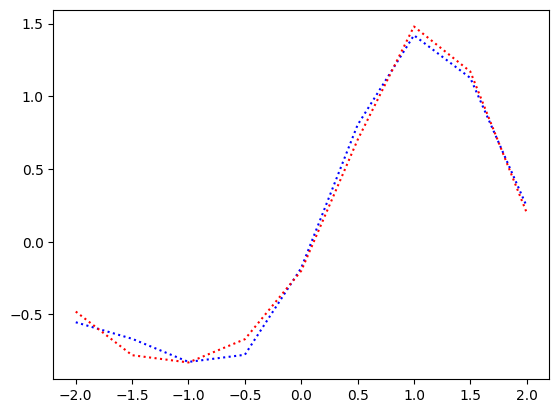

In [7]:
plt.plot(x_test, y_test,color='b', label='new_func', linestyle="dotted")
plt.plot(x, y, color='r', label='old_func',linestyle="dotted")
plt.show()